train data size is  300
Train Data MSE =  0.0027309621503776803
param under  0.01  is  258
param under  0.001  is  252
param under  0.0001  is  251
param under  1e-05  is  251
param under  1e-06  is  242
param under  1e-07  is  173
Test Data MSE =  0.0010737648788770643


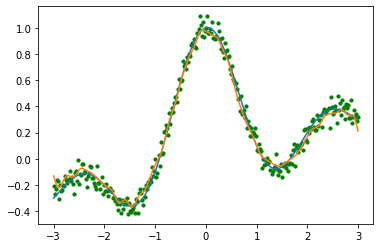

In [114]:
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise

def real_func(x):
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    return target


def calc_design_matrix(x, c, h):
    return np.exp(-(x[None] - c[:, None]) ** 2 / (2 * h ** 2))


# create sample
sample_size = 300
print("train data size is ", sample_size)
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)

# calculate design matrix
h = 0.1
k = calc_design_matrix(x, x, h)
l = 0.3

#theta, z, u の初期値をランダムに生成, 乱数を使用
np.random.seed(seed=10)
theta = np.random.random_sample((sample_size, 1))
z = theta
u = np.random.random_sample((sample_size, 1))

#交互方向乗数法をもとに収束するまで行う
#今回はシンプルに100回回すことにした(収束することは実行して確かめた)
for stop in range(1000):
  KI = k.T.dot(k) + np.identity(len(k))
  next_theta = np.matmul(np.linalg.inv(KI), (k.T.dot(y[:, None]) + z - u))
  next_z = np.maximum(0, next_theta + u - l) + np.minimum(0, next_theta + u + l)
  next_u = u + next_theta - next_z
  theta = next_theta
  z = next_z
  u = next_u

#Trainデータに対する平均二乗誤差
e = k.dot(theta) - y[:, None]
train_MSE = np.linalg.norm(e**2, ord=1) / sample_size
print("Train Data MSE = ", train_MSE)

print("param under ", 0.01, " is " , np.sum(theta < 0.01))
print("param under ", 0.001, " is " , np.sum(theta < 0.001))
print("param under ", 0.0001, " is " , np.sum(theta < 0.0001))
print("param under ", 0.00001, " is " , np.sum(theta < 0.00001))
print("param under ", 0.000001, " is " , np.sum(theta < 0.000001))
print("param under ", 0.0000001, " is " , np.sum(theta < 0.0000001))

# create data to visualize the prediction
test_num = 5000
X = np.linspace(start=xmin, stop=xmax, num=test_num)
K = calc_design_matrix(x, X, h)
prediction = K.dot(theta)
#正解のデータ
Y = real_func(X)

#Testデータに対する平均二乗誤差
ee = K.dot(theta) - Y[:, None]
test_MSE = np.linalg.norm(ee**2, ord=1) / test_num
print("Test Data MSE = ", test_MSE)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o', s=10)
plt.plot(X, Y)
plt.plot(X, prediction)
#plt.savefig('lecture2-p43.png')